# "*Первое впечатление или как попасть на второе свидание?*"

*Проект по курсу «Наука о данных», Совместный бакалавриат ВШЭ-РЭШ, 2022-23 учебный год.*

*Автор работы: Вишнякова Екатерина.*

### Мой проект будет состоять из двух частей:


<span style="font-size:15px">        

    1. Анализ датасета "Speed Dating Data", где мы проанализируем, что больше всего влияет на первое впечатление о нашем потенциальном партнере и используем продвинутые визуализации, с помощью которых и сделаем выводы.
    2. Создание сайта, где можно сгенерировать "love letter" для своей второй половинки. Для этого мы используем fine-tuning gpt-2 на текстах, часть из которых получим с помощью scrapy.

Для начала посмотрим на датасет "Speed Dating Data", который находится в открытом доступе на kaggle(https://www.kaggle.com/datasets/annavictoria/speed-dating-experiment). В нем находятся результаты эксперимента "быстрых свиданий", которые длились 4 минуты, после чего каждый из участников принимал решение о том, хочет ли он еще раз встретиться с человеком или нет.

Таким образом, на основе имеющихся данных можно сделать выводы о том, что в общем влияет на первое впечатление о партнере.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Hp\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Hp\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("C:/Users/Hp/Downloads/Speed Dating Data.csv", encoding='latin-1')

In [3]:
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
for column in data.columns:
    print(column)

iid
id
gender
idg
condtn
wave
round
position
positin1
order
partner
pid
match
int_corr
samerace
age_o
race_o
pf_o_att
pf_o_sin
pf_o_int
pf_o_fun
pf_o_amb
pf_o_sha
dec_o
attr_o
sinc_o
intel_o
fun_o
amb_o
shar_o
like_o
prob_o
met_o
age
field
field_cd
undergra
mn_sat
tuition
race
imprace
imprelig
from
zipcode
income
goal
date
go_out
career
career_c
sports
tvsports
exercise
dining
museums
art
hiking
gaming
clubbing
reading
tv
theater
movies
concerts
music
shopping
yoga
exphappy
expnum
attr1_1
sinc1_1
intel1_1
fun1_1
amb1_1
shar1_1
attr4_1
sinc4_1
intel4_1
fun4_1
amb4_1
shar4_1
attr2_1
sinc2_1
intel2_1
fun2_1
amb2_1
shar2_1
attr3_1
sinc3_1
fun3_1
intel3_1
amb3_1
attr5_1
sinc5_1
intel5_1
fun5_1
amb5_1
dec
attr
sinc
intel
fun
amb
shar
like
prob
met
match_es
attr1_s
sinc1_s
intel1_s
fun1_s
amb1_s
shar1_s
attr3_s
sinc3_s
intel3_s
fun3_s
amb3_s
satis_2
length
numdat_2
attr7_2
sinc7_2
intel7_2
fun7_2
amb7_2
shar7_2
attr1_2
sinc1_2
intel1_2
fun1_2
amb1_2
shar1_2
attr4_2
sinc4_2
intel4_2
fun4_2
amb

Подробное описание каждой колонки можно найти в прилагающемся word файле, но мы подробнее остановимся на следующих колонках: gender(1 - female, 0 - male), match (пойдет ли на второе свидание или нет: 0 - no, 1 - yes), int_corr (корреляция интересов), {attr, sinc, intel, fun, amb, shar, like} - насколько привлекательным, искренним, образованным, забавным, амбициозным показался партнер по свиданию данному человеку и насколько похоже их интересы по его мнению и насколько хорошее общее впечатление, age.

Поэтому создадим новую таблицу и переименуем колонки.

In [5]:
columns = {"attr":"Привлекательность", "sinc":"Искренность", "intel":"Образованность", "fun":"Чувство юмора", "amb":"Амбициозность", "like":"Общее впечатление", "shar": "Интересы партнера", "age": "Возраст", "gender": "Пол", "match": "Взаимность", "int_corr": "Схожесть интересов", "zipcode": "Почтовый индекс"}
data_new = data[['gender', 'match', 'int_corr', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'age', 'like', 'zipcode']].reset_index().rename(columns=columns)

In [6]:
data_new

,index,Пол,Взаимность,Схожесть интересов,Привлекательность,Искренность,Образованность,Чувство юмора,Амбициозность,Интересы партнера,Возраст,Общее впечатление,Почтовый индекс
0,0,0,0,0.14,6.0,9.0,7.0,7.0,6.0,5.0,21.0,7.0,"60,521"
1,1,0,0,0.54,7.0,8.0,7.0,8.0,5.0,6.0,21.0,7.0,"60,521"
2,2,0,1,0.16,5.0,8.0,9.0,8.0,5.0,7.0,21.0,7.0,"60,521"
3,3,0,1,0.61,7.0,6.0,8.0,7.0,6.0,8.0,21.0,7.0,"60,521"
4,4,0,1,0.21,5.0,6.0,7.0,7.0,6.0,6.0,21.0,6.0,"60,521"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,8373,1,0,0.64,3.0,5.0,5.0,5.0,NaN,NaN,25.0,2.0,"78,110"
8374,8374,1,0,0.71,4.0,6.0,8.0,4.0,4.0,NaN,25.0,4.0,"78,110"
8375,8375,1,0,-0.46,4.0,7.0,8.0,8.0,8.0,NaN,25.0,6.0,"78,110"
8376,8376,1,0,0.62,4.0,6.0,5.0,4.0,NaN,5.0,25.0,5.0,"78,110"


Посмотрим, откуда наши участники. Для этого воспользуемся колонкой "Почтовый индекс" и датасетом, который сопоставляет почтовому индексу широту и долготу.

In [7]:
data_new['Почтовый индекс'] = data_new['Почтовый индекс'].str.replace(',', '')

In [14]:
data_new_geo = data_new.dropna(subset=['Почтовый индекс'])

In [9]:
zipcodes = pd.read_csv("C:/Users/Hp/Downloads/zip_to_lat_lon_North America.csv")

C:\Users\Hp\AppData\Local\Temp\ipykernel_24712\3933330817.py:1: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  zipcodes = pd.read_csv("C:/Users/Hp/Downloads/zip_to_lat_lon_North America.csv")


In [15]:
data_new_geo['longitude'] = pd.NA
data_new_geo['latitude'] = pd.NA

for index, row in data_new_geo.iterrows():
    zipcode = row['Почтовый индекс']
    
    matching_rows = zipcodes[zipcodes['postal code'] == int(zipcode)]

    if len(matching_rows) > 1 :
        matching_row = matching_rows[matching_rows['Country'] == 'United States']
        
        if len(matching_row) == 0:
            longitude = matching_rows['longitude'].values[0]
            latitude = matching_rows['latitude'].values[0]
        else:
            longitude = matching_row['longitude'].values[0]
            latitude = matching_row['latitude'].values[0]
            
        data_new_geo.loc[index, 'longitude'] = longitude
        data_new_geo.loc[index, 'latitude'] = latitude
        
    elif len(matching_rows) == 1:
        longitude = matching_rows['longitude'].values[0]
        latitude = matching_rows['latitude'].values[0]
        data_new_geo.loc[index, 'longitude'] = longitude
        data_new_geo.loc[index, 'latitude'] = latitude

C:\Users\Hp\AppData\Local\Temp\ipykernel_24712\2645345442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_geo['longitude'] = pd.NA
C:\Users\Hp\AppData\Local\Temp\ipykernel_24712\2645345442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_geo['latitude'] = pd.NA


**Чтобы построить карту, важно, чтобы longitude и latitude не содержали NaN.**

In [16]:
data_new_geo['latitude'].unique()

array([41.8001, 33.4995, 41.7997, 29.6722, 37.3814, 39.1125, 34.2092,
       <NA>, 40.0161, 42.4406, 33.9291, 39.1848, 25.7, 33.8542, 40.7763,
       42.3164, 42.8569, 40.9265, 42.2694, 40.5877, 41.5385, 37.9053,
       41.0572, 38.8029, 42.528, 43.0654, 40.578, 42.2941, 34.5705,
       40.2197, 39.1802, 40.7975, 34.0766, 37.4056, 40.8116, 37.8002,
       38.1437, 40.7255, 39.5213, 37.1578, 40.1576, 29.7972, 39.9772,
       40.6179, 39.7312, 42.1138, 34.107, 26.403, 40.9049, 40.4109,
       33.1826, 35.3285, 37.418, 40.7229, 44.5548, 33.8397, 38.8338,
       43.073, 44.9138, 42.1645, 41.2195, 27.9056, 41.5008, 45.04,
       40.0839, 39.8805, 32.723, 46.8193, 40.7651, 35.4993, 33.4317,
       44.9052, 40.3182, 41.1705, 18.9548, 42.6967, 37.7929, 40.7881,
       40.6669, 39.2447, 40.7571, 42.1598, 39.6463, 30.4036, 31.0723,
       42.5051, 40.2166, 42.5065, 40.8629, 43.1409, 40.6016, 36.0716,
       40.7867, 18.4663, 40.9492, 35.0821, 40.685, 30.1693, 38.978,
       40.5682, 40.7685, 42.

In [17]:
data_new_geo['longitude'].unique()

array([-87.9287, -86.7268, -72.2478, -95.4861, -122.1258, -77.2515,
       -118.8739, <NA>, -75.7183, -76.4966, -117.8845, -84.3448, -80.413,
       -83.408, -73.9529, -71.1612, -71.6075, -74.0392, -83.7282,
       -73.6595, -90.5613, -122.0549, -73.8136, -77.2116, -71.109,
       -75.2906, -74.3589, -83.2536, -80.9133, -74.5939, -84.4204,
       -73.9683, -118.2646, -122.0775, -73.955, -122.4091, -76.6355,
       -73.9983, -76.8047, -89.1825, -75.2799, -95.3288, -75.2545,
       -73.9856, -75.1297, -76.2528, -117.5941, -80.1813, -74.3646,
       -74.238, -87.4827, -106.5309, -122.1274, -73.8473, -68.4121,
       -118.3542, -90.2936, -89.4528, -93.485, -71.1355, -73.3715,
       -82.2881, -81.5516, -93.4865, -82.9726, -74.9706, -97.4483,
       -123.0406, -73.9858, -80.8486, -111.8469, -93.3403, -74.2639,
       -73.7715, -99.2405, -84.2926, -122.4079, -73.5331, -73.9828,
       -84.3455, -73.9657, -87.9644, -105.0092, -97.7526, -97.472,
       -83.4072, -75.2565, -83.3484, -73.9879, -

In [18]:
data_new_geo_for_map = data_new_geo.dropna(subset=['latitude'])
data_new_geo_for_map = data_new_geo_for_map.dropna(subset=['latitude'])

In [20]:
import folium

map_of_participants = folium.Map(location=[40.7128, -74.0060], zoom_start=1)  

for index, row in data_new_geo_for_map.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    
    folium.Marker(location=[latitude, longitude]).add_to(map_of_participants)

map_of_participants


Большинство участников из Северной Америки.

>Теперь посмотрим на распределение по возрасту  в общем и для каждого пола. Посчитаем средний возраст для мужчин и для женщин.

In [21]:
for gender, mean in zip(['мужчин', 'женщин'],data_new.groupby('Пол')['Возраст'].mean()):
    if gender == 'мужчин':
        man = round(mean)
    else:
        woman = round(mean)
    print(f'Для {gender}, принявших участие в эксперименте, средний возраст {round(mean)}.')

Для мужчин, принявших участие в эксперименте, средний возраст 26.
Для женщин, принявших участие в эксперименте, средний возраст 27.


<sup>*</sup>**использование групп и агрегирующей функции pandas**

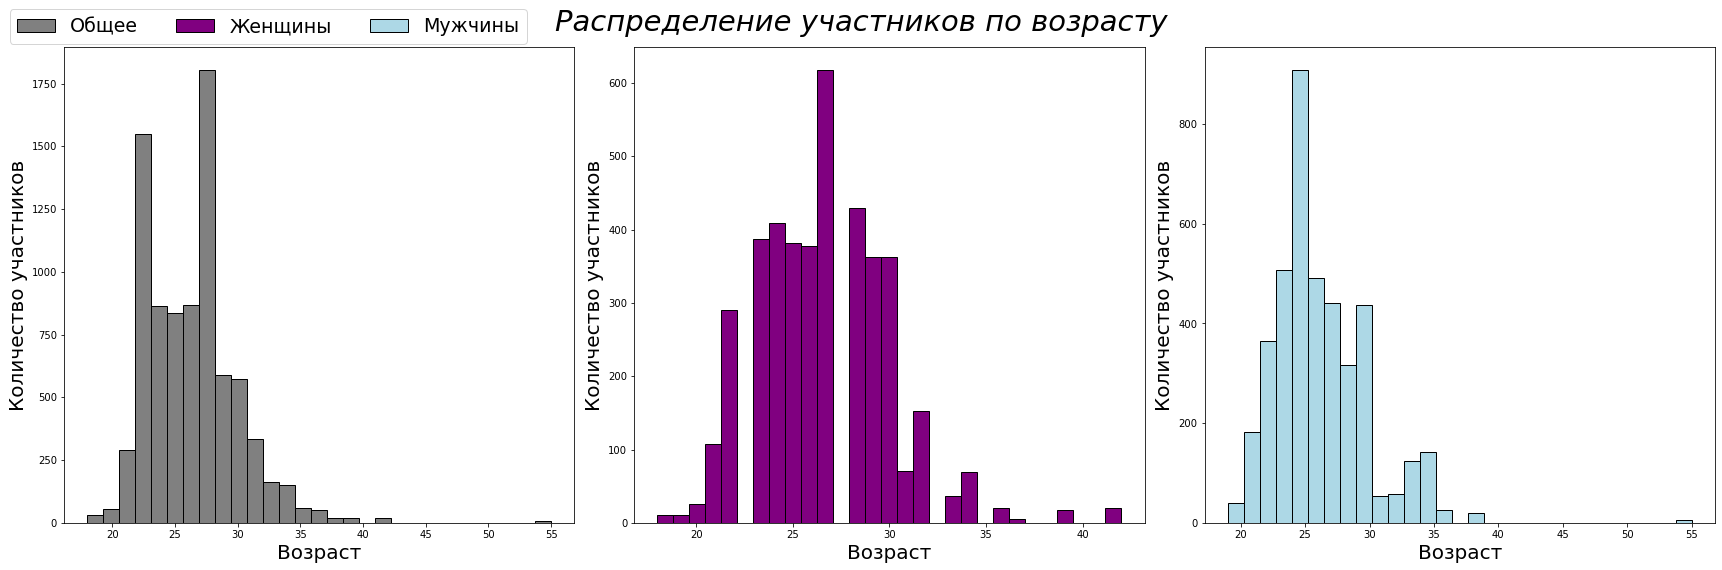

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))

axes[0].hist(data_new['Возраст'], bins=29, color='grey', edgecolor='black')
axes[0].set_xlabel('Возраст', fontsize=20)
axes[0].set_ylabel('Количество участников', fontsize=20)

axes[1].hist(data_new[data_new['Пол'] == 1]['Возраст'], bins=29, color='purple', edgecolor='black')
axes[1].set_xlabel('Возраст', fontsize=20)
axes[1].set_ylabel('Количество участников', fontsize=20)

axes[2].hist(data_new[data_new['Пол'] == 0]['Возраст'], bins=29, color='lightblue', edgecolor='black')
axes[2].set_xlabel('Возраст', fontsize=20)
axes[2].set_ylabel('Количество участников', fontsize=20)

plt.suptitle('Распределение участников по возрасту', fontsize=29, fontstyle='oblique')

labels = ['Общее','Женщины','Мужчины']
fig.legend(labels, loc='upper left', ncol=3, fontsize=19)

plt.tight_layout()

plt.show()


Напишем функцию, которая будет считать корреляцию между столбцами и рисовать график. И посмотрим на корреляцию столбца "Общее впечатление", чтобы сделать вывод о том, какие параметры больше всего влияют на первое впечатление для каждого пола.

In [23]:
def plot_of_corr(first_column, second_column, color='blue'):
    corr = first_column.corr(second_column)
    sns.scatterplot(x=first_column, y=second_column, color=color)
    plt.title(f"Корреляция: {corr:.2f}")
    plt.xlabel(first_column.name)
    plt.ylabel(second_column.name)
    plt.show()

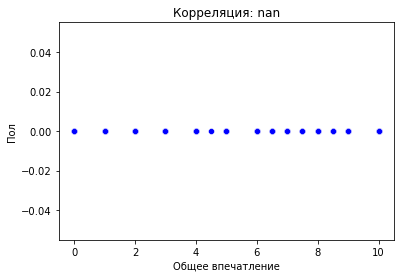

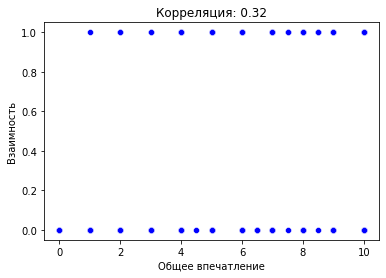

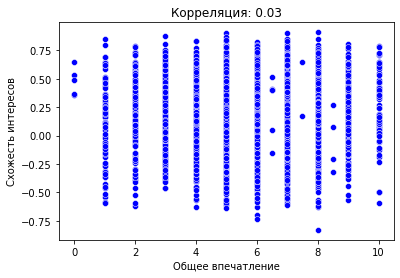

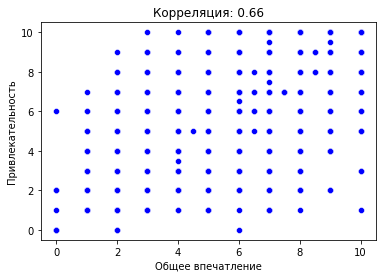

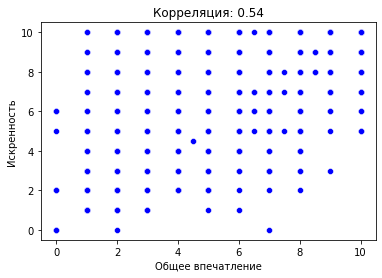

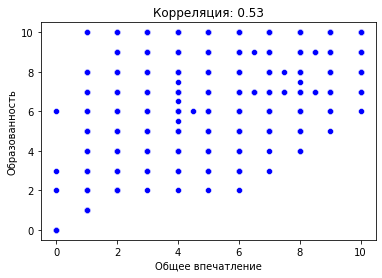

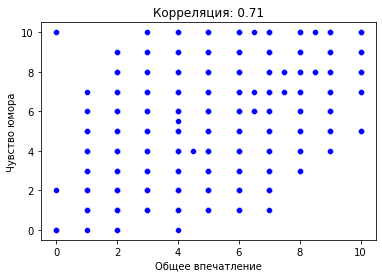

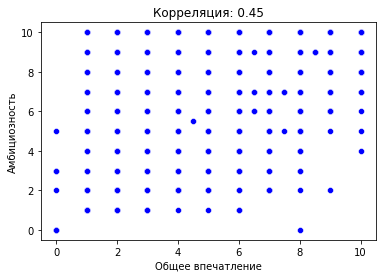

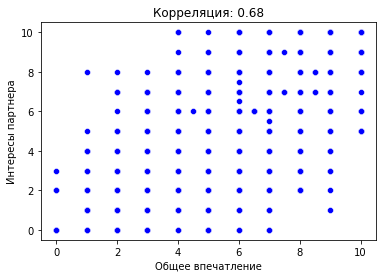

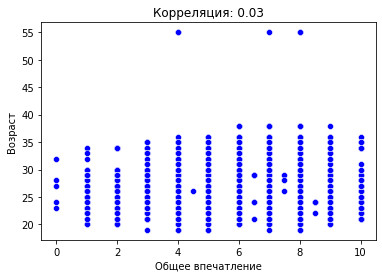

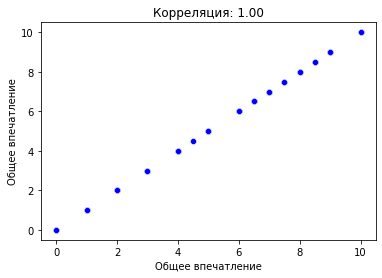

In [24]:
for column in data_new.columns[1:-1]:
    plot_of_corr(data_new[data_new['Пол'] == 0]['Общее впечатление'], data_new[data_new['Пол'] == 0][column]) 

>Таким образом, как мы видим, мужчины больше всего обращают внимание на привлекательность(внешность)(3), искренность, образованность, чувство юмора(1) и интересы партнера(2).
Вопреки различным стереотипам привлекательность не на первом месте.

Теперь сделаем то же самое для девушек.

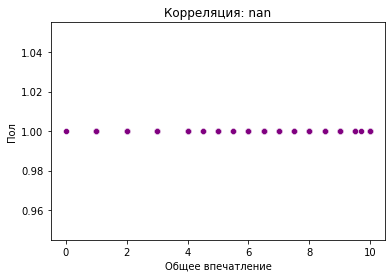

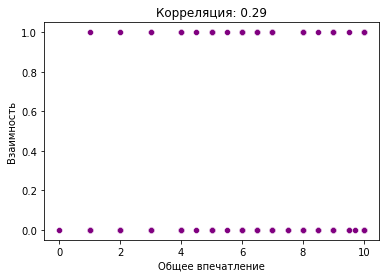

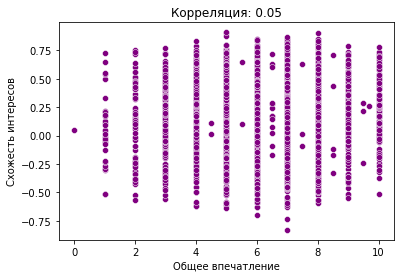

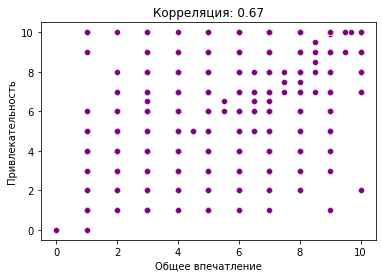

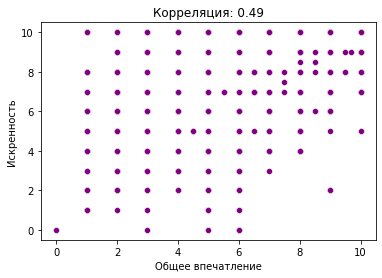

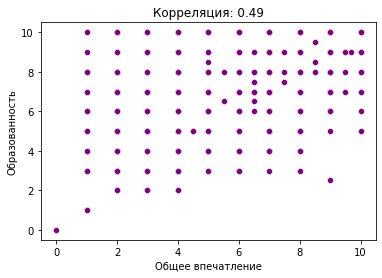

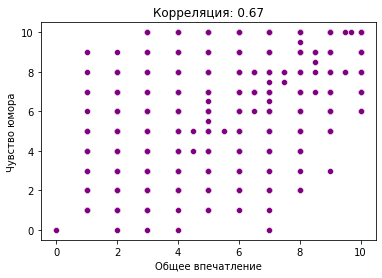

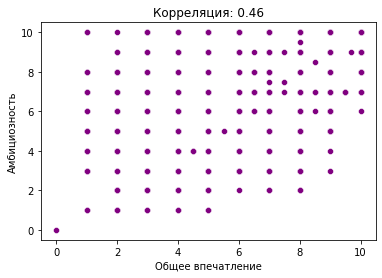

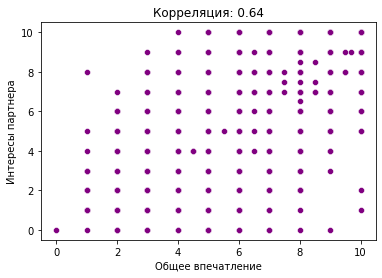

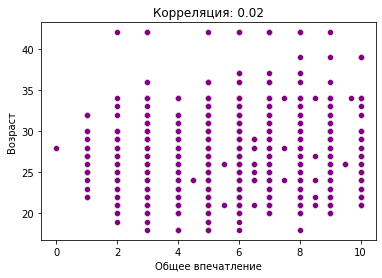

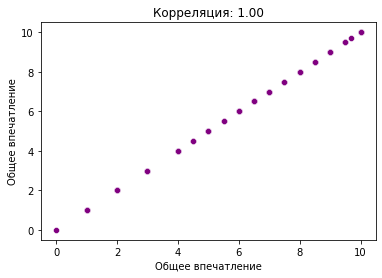

In [25]:
for column in data_new.columns[1:-1]:
    plot_of_corr(data_new[data_new['Пол'] == 1]['Общее впечатление'], data_new[data_new['Пол'] == 1][column], color='purple')
    

>В свою очередь девушки обращают внимание на привлекательность(1),чувство юмора(1) и  интересы партнера(2).

**В обоих случаях я отбираю параметры с корреляцией больше 0.5, исходя из предпосылки, что это может означать, что для большинства данный параметр влияет сильнее на общее впечатление о человеке.**

### Ура! Теперь мы знаем, на что больше обращают внимание девушки и мужчины на первом свидании)


Если ваше первое свидание прошло хорошо и вы собираетесь на второе(или 100-ое) с намерением впечатлить партнера, возможно, вы захотите написать ей/ему love letter. Для этого дообучим gpt-2, языковую модель, предназначенную для генерации текста, на цитатах о любви с сайта "goodreads" и корпусе любовных писем из датасета с kaggle 'love letters'(https://www.kaggle.com/datasets/fillerink/love-letters).

Я использую именно их, так как gpt-2 все-таки направлена на генерацию английского текста.



1. Для начала воспользуемся LoveQuoteSpider из файла quotelovespider это класс, унаследованный от Spider, с помощью которых мы получаем данные (цитату и ее автора) с первых 100 страниц сайта https://www.goodreads.com/quotes/tag/love-quotes?page=1. Чтобы воспользоваться им вставьте в коммандую строку команду в директории, где хранится наш файл, <scrapy runspider quotelovespider.py -o lovingquotes.csv> и тогда он поместит всю необходимую информацию в файл lovingquotes.csv.

2. Теперь обработаем немного полученные данные и объединим их с love_letters.

In [26]:
import os
import pandas as pd

path = 'C:/Users/Hp/Downloads/love_letters'  
letters = []

for filename in os.listdir(path):
    if filename.endswith('.txt'):
        file_path = os.path.join(path, filename)
        with open(file_path, 'r', encoding='utf-8') as file:
            letter = file.read()
            letters.append(letter)

In [27]:
quotes = pd.read_csv('C:/Users/Hp/Downloads/lovingquotes.csv')

quotes['quote'] = quotes['quote'].str.replace('вЂќ', '')
quotes['quote'] = quotes['quote'].str.replace('“', '')
quotes['quote'] = quotes['quote'].str.replace('”', '')

new_data = pd.DataFrame({'quote': letters, 'author': 'Unknown'})

all_information = pd.concat([quotes, new_data], ignore_index=True)

Проверим, вся ли информация у нас на английском языке и воспользуемся дополнительной библиотекой langdetect для этого.

In [28]:
from langdetect import detect

filtered_inf = pd.DataFrame(columns=['quote', 'author'])

for index, row in all_information.iterrows():
    quote = row['quote']
    
    if not quote.strip():
        continue
    
    try:
        language = detect(quote)
    except:
        continue
    
    if language == 'en':
        filtered_inf = pd.concat([filtered_inf, row.to_frame().T], ignore_index=True)

print(filtered_inf)

                                                  quote               author
0     I love you as certain dark things are loved, s...        Pablo Neruda,
1     It is an absolute human certainty that no one ...  John Joseph Powell,
2     If I have learned anything in this long life o...      Kristin Hannah,
3                      I choose to love you in silence…                 Rumi
4                                             your hand         Sanober Khan
...                                                 ...                  ...
2738  …it is so easy a thing for you to lift me to S...              Unknown
2739  There would have been the making of an accompl...              Unknown
2740  My noble, incomparable Edith,\nI do not know h...              Unknown
2741  I would have liked to have dined with you toda...              Unknown
2742  To Robert Browning:\nAnd now listen to me in t...              Unknown

[2743 rows x 2 columns]


Заметим, что во многих строках у нас встречаются имена, поэтому я взяла файл с именами детей в США https://www.ssa.gov/oact/babynames/limits.html и создала множество с уникальными с именами.

In [29]:
folder_path = "C:/Users/Hp/Downloads/names"
names = set()

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    with open(file_path, 'r') as file:
        for line in file:
            name = line.split(',')[0].strip()
            if name not in names: 
                names.add(name)

Чтобы наша модель не учила имена в тексте, то заменим все имена на токен \<NAME>, используя регулярные выражения.

In [30]:
import re

all_names = '|'.join(names)

filtered_inf['quote'] = filtered_inf['quote'].apply(lambda x: re.sub(all_names, '<NAME>', x))

In [31]:
def many_names(row):
    quote = row['quote']
    quote = re.sub(r'(<NAME>)\s+(<NAME>)', r'\1', quote)  # Заменим <NAME> <NAME> на <NAME>
    quote = re.sub(r'(<NAME>){2,}', r'<NAME>', quote)  # Заменим двух и более <NAME> на <NAME>
    return quote

filtered_inf['quote'] = filtered_inf.apply(many_names, axis=1)

In [32]:
filtered_inf['quote'] = filtered_inf['quote'].str.replace(r'(?<=<NAME>)\S*(?=\s)', '', regex=True)

In [33]:
filtered_inf

,quote,author
0,"I love you as certain dark things are loved, s...","Pablo Neruda,"
1,It is an absolute human certainty that no one ...,"John Joseph Powell,"
2,If I have learned anything in this long life o...,"Kristin Hannah,"
3,I choose to love you in silence…,Rumi
4,your hand,Sanober Khan
...,...,...
2738,…it is so easy a thing for you to lift me to <...,Unknown
2739,<NAME> would have been the making of an accomp...,Unknown
2740,"<NAME> noble, incomparable <NAME>\nI do not kn...",Unknown
2741,I would have liked to have dined with you toda...,Unknown


In [34]:
filtered_inf.to_csv('filtered_inf.csv', index=False)

Для fine_tuning модели перейдем в другой файл "Generation model", чтобы не загромождать этот.

3. После обучения модели мы наконец можем создать сайт на streamlit.(Заметьте, что во всех файлах я указываю явный путь ко всем использующимся документам/ моделям, поэтому, если вы будете запускать его, то переукажите их) Какие возможности сайта?

Мне показалось, что отличной визуализацией моего проекта будет облако слов( наиболее часто встречающихся в нашей подборке). Давайте нарисуем ее, сохраним и добавим на сайт. У меня не получилось сделать это в юпитер ноутбуке (скорее всего из-за несовпадений каких-то версий библиотек), поэтому я сделала все в коллабе(файл и ссылка прилагаются).

In [35]:
from IPython.display import Image
my_image = Image(filename='C:/Users/Hp/Downloads/wordcloud.png')

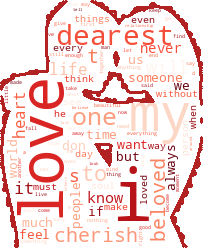

In [36]:
my_image

Эта картинка используется в моем приложении на streamlit. К сожалению, у меня не получилось загрузить его на streamlit sharing, но оно находится в приложении streamlit.py и его можно запустить локально. В нем я используют дообученую модель "gpt-2"(код для ее дообучения находится в файле "generation model", а сама модель в папке "model 2"), а также cat api.